# Bank Customer Churn Prediction Using Machine Learning

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.shape

(10000, 14)

In [5]:
data.value_counts('Exited')

Exited
0    7963
1    2037
dtype: int64

In [6]:
data.value_counts('Geography')

Geography
France     5014
Germany    2509
Spain      2477
dtype: int64

# Exploratory Data Analysis
The first thing we have to do in Exploratory Data Analysis is checked if there are null values in the dataset.

In [7]:
data.isnull().head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
#Checking Data types
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

0    7963
1    2037
Name: Exited, dtype: int64


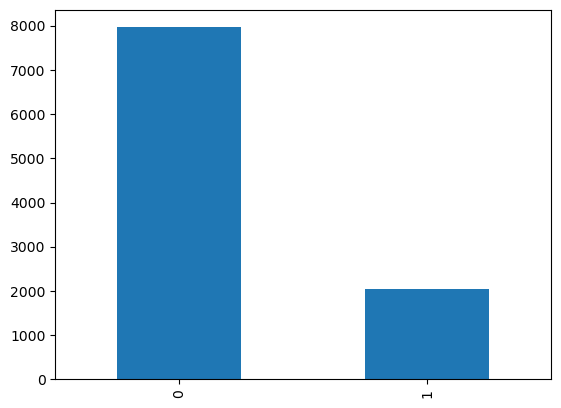

In [11]:
#Counting 1 and 0 Value in Churn column
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = data["Exited"].map(lambda x: color_wheel.get(x + 1))
print(data.Exited.value_counts())
p=data.Exited.value_counts().plot(kind="bar")

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

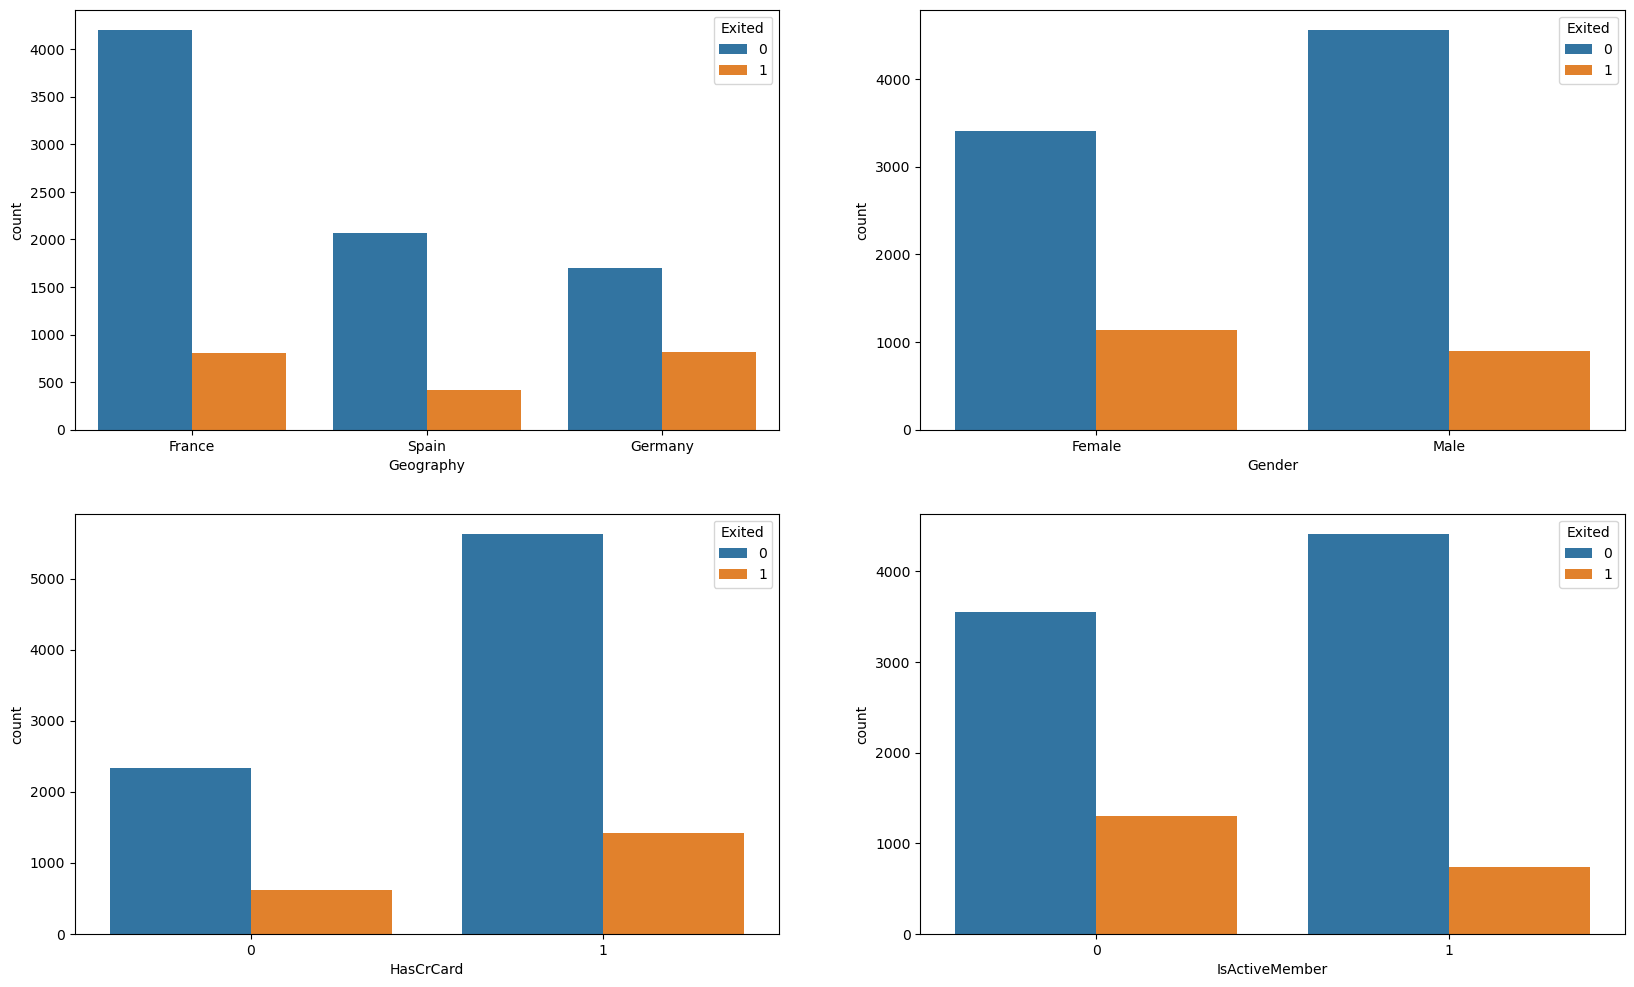

In [13]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = data, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = data, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = data, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = data, ax=axarr[1][1])

We note the following:

Majority of the data is from persons from France. However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients. 

The proportion of female customers churning is also greater than that of male customers Interestingly, majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence. 

Unsurprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive mebers is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn.

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

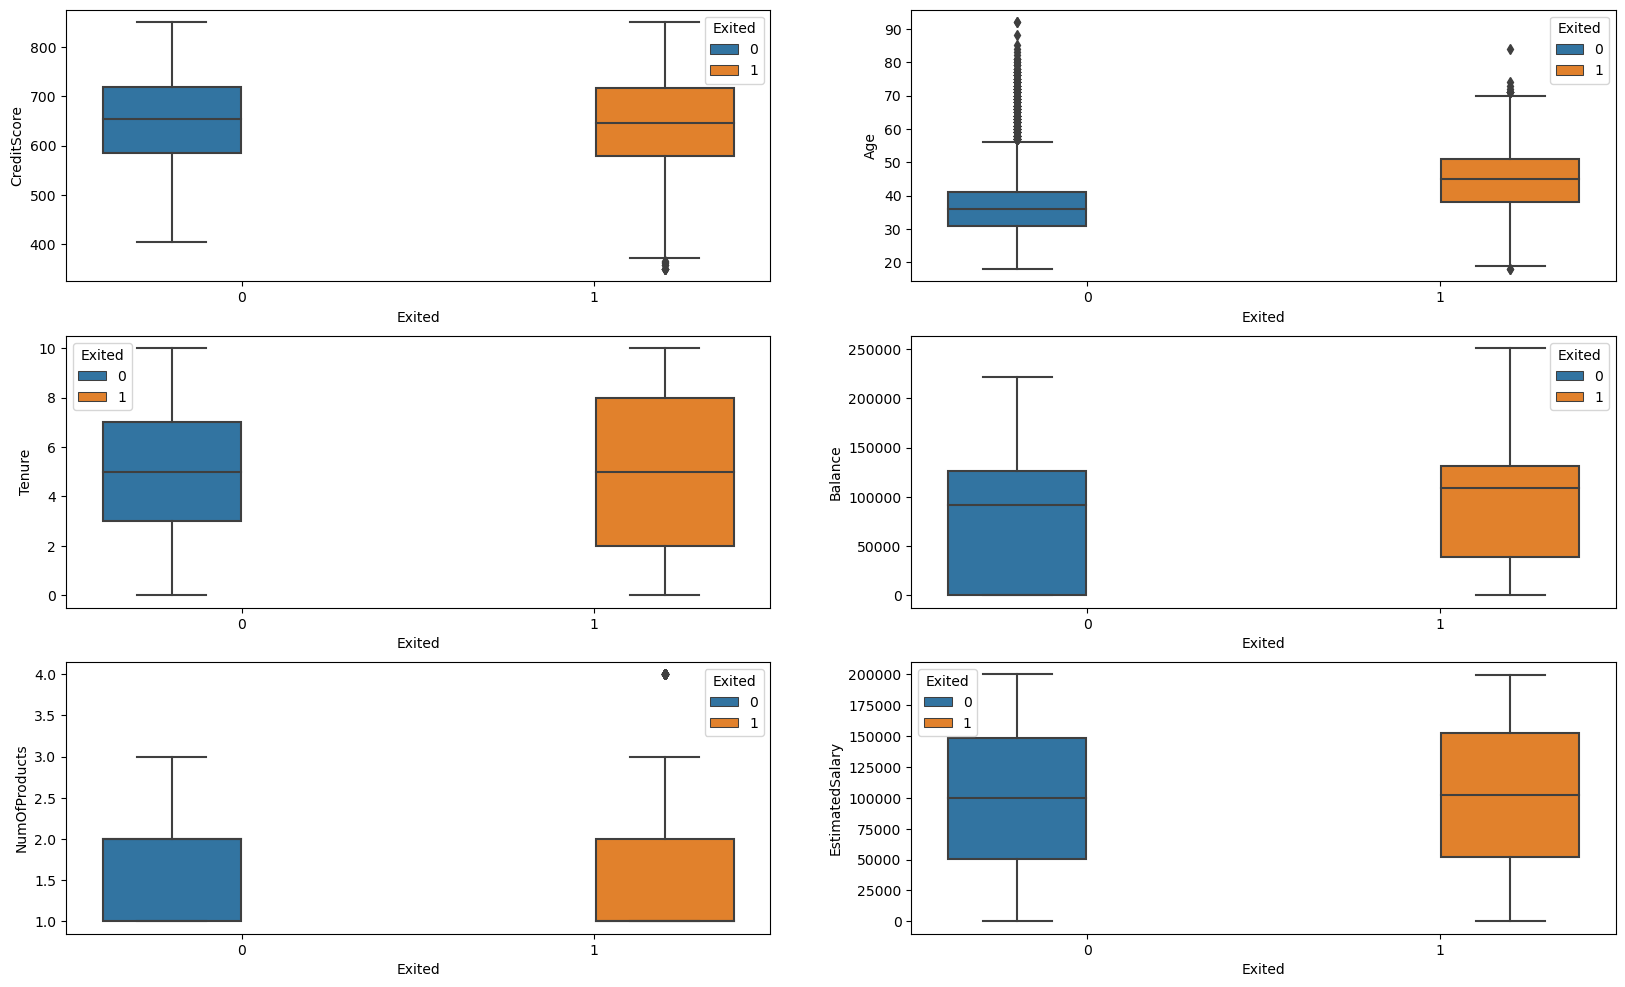

In [14]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = data, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = data , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = data, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = data, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = data, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = data, ax=axarr[2][1])

We note the following:

-> There is no significant difference in the credit score distribution between retained and churned customers.

-> The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups

-> With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.

-> Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.

-> Neither the product nor the salary has a significant effect on the likelihood to churn.

In [15]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
#Change value in country column
data['Geography'] = data['Geography'].replace(['Germany'],'0')
data['Geography'] = data['Geography'].replace(['France'],'1')
data['Geography'] = data['Geography'].replace(['Spain'],'2')
#Change value in gender column
data['Gender'] = data['Gender'].replace(['Female'],'0')
data['Gender'] = data['Gender'].replace(['Male'],'1')

In [18]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [19]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,1,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,1,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,1,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,0,1,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,1,0,28,4,130142.79,1,1,0,38190.78,0


In [20]:
data=data.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [21]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [23]:
#convert object data types column to integer
data['Geography'] = pd.to_numeric(data['Geography'])
data['Gender'] = pd.to_numeric(data['Gender'])


In [24]:
data.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

<AxesSubplot:>

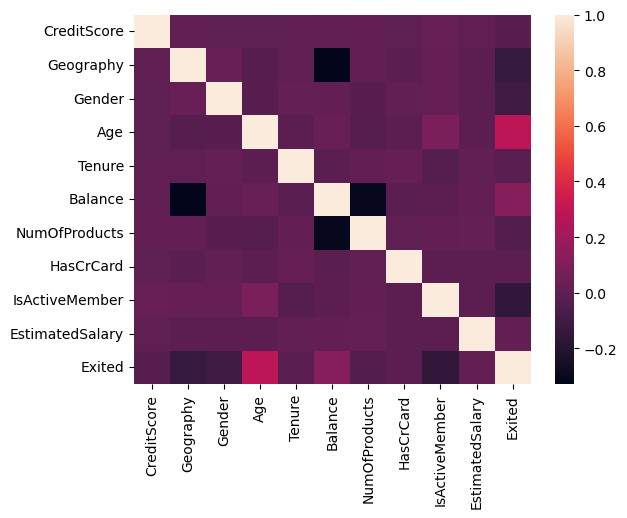

In [25]:
sns.heatmap(data.corr(),fmt='.2g')

# Build Machine Learning Model

In [26]:
x=data.drop('Exited',axis=1)

In [27]:
y=data['Exited']

In [28]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=7)

# DecisionTree

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
dtree=DecisionTreeClassifier()

In [31]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
y_pred=dtree.predict(x_test)

In [33]:
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 79.05 %


# RandomForest

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rforest=RandomForestClassifier()

In [36]:
rforest.fit(x_train,y_train)

RandomForestClassifier()

In [37]:
y_pred=rforest.predict(x_test)

In [38]:
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 86.3 %


# Support Vector Machine

In [40]:
from sklearn import svm
svm = svm.SVC()
svm.fit(x_train, y_train)

SVC()

In [41]:
y_pred = svm.predict(x_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 79.45 %


# KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn=KNeighborsClassifier(n_neighbors=1)

In [47]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [48]:
y_pred=knn.predict(x_test)

C:\Users\91807\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [49]:
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 67.9 %


In [51]:
!pip install xgboost

     -------------------------------------- 89.1/89.1 MB 712.4 kB/s eta 0:00:00


# XGBoost

In [52]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [53]:
y_pred = xgb_model.predict(x_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 85.9 %


# Visualize Random Forest and XGBoost Algorithm because Random Forest and XGBoost Algorithm have the Best Accuracy

In [54]:
#importing classification report and confusion matrix from sklearn

from sklearn.metrics import classification_report, confusion_matrix

# Random Forest

In [56]:
y_pred = rforest.predict(x_test)
print("Classification report - n", classification_report(y_test,y_pred))

Classification report - n               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1589
           1       0.77      0.48      0.59       411

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



Text(0.5, 1.0, 'Accuracy Score: 0.863')

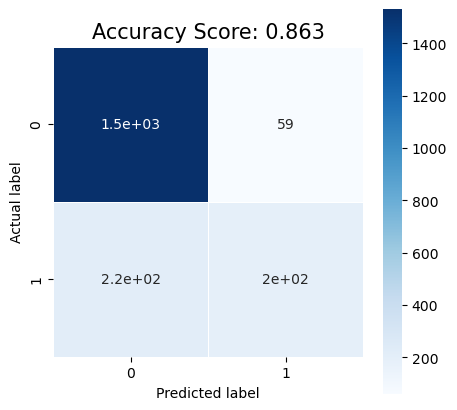

In [57]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(rforest.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

# XGBoost

In [58]:
y_pred = xgb_model.predict(x_test)
print("Classification report - n", classification_report(y_test,y_pred))

Classification report - n               precision    recall  f1-score   support

           0       0.88      0.95      0.91      1589
           1       0.73      0.50      0.59       411

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



Text(0.5, 1.0, 'Accuracy Score: 0.859')

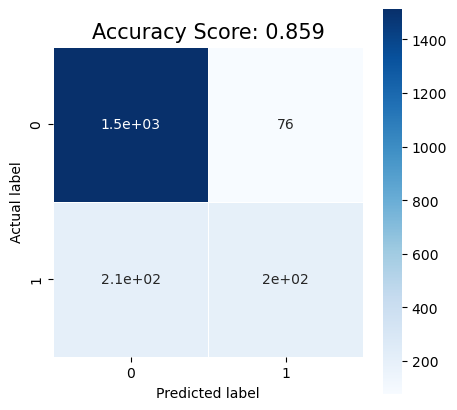

In [59]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(xgb_model.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

# Conclusion
The churn variable has imbalanced data. So, the solution to handle imbalanced data are :

Resample Training set
Use K-fold Cross-Validation in the Right Way
Ensemble Different Resampled Datasets
We have to change the value in the Country and Gender columns so the Machine Learning model can read and predict the dataset; after changing the value, we have to change the data types on the Country and Gender column from string to integer because XGBoost Machine Learning Model cannot read string data types even though the value in the column is number.

Lastly, XGBoost and Random Forest are the best algorithms to predict Bank Customer Churn since they have the highest accuracy (86,85% and 86.45%). Random Forest and XGBoost have perfect AUC Scores. They have 0.8731 and 0.8600 AUC Scores.